In [1]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir) 
from core import expression_plots 
from core import io_library 
#from IPython.core.debugger import Tracer
import numpy as np
import pandas as pd
from collections import Counter #, defaultdict
#import re
import matplotlib.pyplot as plt 
#import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
#Load various SC NMPP1 experiment data

#load raw data for NMPP1 experiments from Capaldi Paper
desired_conditions = [('100uM NMPP1','GSM1423542')]
data_dir = base_dir + '\expression_data\GSE58992_Capaldi_2014\\'
GEO_accession = 'GSE58992'
capaldi_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)

#Load PKA inhibition data for O'shea
oshea_SC_PKA_data = io_library.load_oshea_NMPP1_data()
# desired_conditions = [('No 1-NMPP1 0 min','GSM812516'), ('3uM 1-NMPP1 40 min','GSM812520')]   
# data_dir = base_dir + '\expression_data\GSE32703_NMPP1_SC\\' 
# GEO_accession = 'GSE32703'
# oshea_SC_PKA_data = io_library.parse_data_series_matrix_SC(desired_conditions, data_dir, GEO_accession)
# oshea_SC_PKA_data['PKA inhibition 3uM 1NMPP1'] = oshea_SC_PKA_data.iloc[:,1].sub(oshea_SC_PKA_data.iloc[:,0])

#Load Kieran's PKA inhibition data
fname_mace_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\SC_1NMPP1_From_Kieran.tsv')
mace_SC_PKA_data = pd.read_table(fname_mace_SC_PKA_data, sep = ' ', index_col = [0])
mace_SC_PKA_data.columns = ['WT_minus','AS_plus','WT_plus']

#Normalize by the total number of reads
mace_SC_PKA_data_total_reads = mace_SC_PKA_data.sum(axis = 'rows')
mace_SC_PKA_data_norm = pd.DataFrame(index = mace_SC_PKA_data.index)
#normalize by total aligned reads, adding in a single pseudocount to avoid dividing by zero
for sample in mace_SC_PKA_data.columns: 
    mace_SC_PKA_data_norm[sample] = (mace_SC_PKA_data[sample]+1)/mace_SC_PKA_data_total_reads[sample]

#Make Fold change columns
mace_SC_PKA_data_norm['WT_log_fold_change']=np.log(mace_SC_PKA_data_norm['WT_plus']/mace_SC_PKA_data_norm['WT_minus'])/np.log(2.0)
mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'] = np.log(mace_SC_PKA_data_norm['AS_plus']/mace_SC_PKA_data_norm['WT_minus'])/np.log(2.0)

#Load Susan's TPK-AS NMPP1 data
fname_SYC_SC_PKA_plus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\NMPP_abundance_paired.tsv')
SYC_SC_PKA_plus = pd.read_table(fname_SYC_SC_PKA_plus, sep = '\t', index_col = [0])
#SYC_SC_PKA_plus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_plus_total_reads = SYC_SC_PKA_plus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_plus_norm = pd.DataFrame(index = SYC_SC_PKA_plus.index)
SYC_SC_PKA_plus_norm['AS_plus'] = (SYC_SC_PKA_plus['est_counts']+1)/SYC_SC_PKA_plus_total_reads


fname_SYC_SC_PKA_minus = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq_SYC\\none_abundance_paired.tsv')
SYC_SC_PKA_minus = pd.read_table(fname_SYC_SC_PKA_minus, sep = '\t', index_col = [0])
#SYC_SC_PKA_minus.columns are: ['length','eff_length','est_counts','TPM']
SYC_SC_PKA_minus_total_reads = SYC_SC_PKA_minus['est_counts'].sum(axis = 'rows')
SYC_SC_PKA_minus_norm = pd.DataFrame(index = SYC_SC_PKA_minus.index)
SYC_SC_PKA_minus_norm['AS_minus'] = (SYC_SC_PKA_minus['est_counts']+1)/SYC_SC_PKA_minus_total_reads

SYC_SC_PKA_data_norm = pd.concat([SYC_SC_PKA_plus_norm, SYC_SC_PKA_minus_norm], axis = 1 )
SYC_SC_PKA_data_norm['AS_log_fold_change'] = np.log(SYC_SC_PKA_data_norm['AS_plus']/SYC_SC_PKA_data_norm['AS_minus'])/np.log(2.0)

#Load Solis 2016 PKA inhibition data
fname_solis_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\solis_2016.xlsx')
solis_SC_all_data = pd.read_excel(fname_solis_SC_PKA_data, header = 3)

#The data set has a lot of duplicated indices - remove duplicates. 
#Make a dictionary by going down the list - this will leave in a bunch of NaNs for duplicates. 
# Inhib is PKA inhibition in the Hsf1 AA background
# X466.1NM is PKA inhibition in the WT background. 
solis_inhib_unique = {}
columns = ['Inhib','X466.1NM']
for item in solis_SC_all_data.iterrows():
    gene = item[1]['locus']
    exp_val = [item[1][column] for column in columns]
    solis_inhib_unique[gene] = exp_val

repeat_counter = Counter(solis_SC_all_data['locus'])
for gene in repeat_counter.keys():
     if repeat_counter[gene] > 1:
        dupe_rows = solis_SC_all_data[solis_SC_all_data['locus']==gene]
        solis_inhib_unique[gene] = [np.nanmean(dupe_rows[column]) for column in columns]

solis_SC = pd.DataFrame.from_dict(solis_inhib_unique, orient = 'index')
solis_SC.columns = columns




C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\lib\nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [7]:
#Merge SCer PKA data
SC_PKA_data_norm = pd.concat([SYC_SC_PKA_data_norm['AS_log_fold_change'], mace_SC_PKA_data_norm['AS_plus_WT_minus_log_fold_change'],oshea_SC_PKA_data['SC_PKA(AS)+1NMPP1'], capaldi_SC_PKA_data['100uM NMPP1'],solis_SC[['Inhib','X466.1NM']]], axis = 1) #, solis_SC_all_data['Inhib']],axis = 1)
SC_PKA_data_norm.columns = ['Chen','Pincus','Oshea','Capaldi','Solis-HSAA','Solis-WT']

<IPython.core.display.Javascript object>


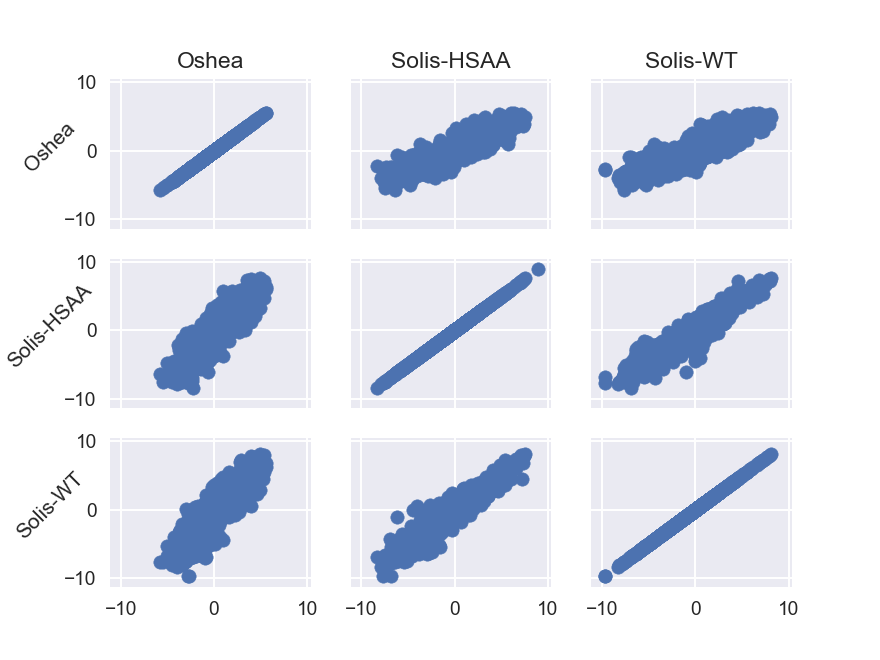

In [8]:
conditions = ['Oshea','Solis-HSAA','Solis-WT']  # 'Chen','Pincus','Capaldi',
fig, axarr = expression_plots.multi_scatter_plot(SC_PKA_data_norm, conditions)

Based on the above plot, the Pincus, and Solis datasets seem like better RNA-seq data than the Chen data dataset because they seem more correlated with Oshea and Capaldi.  

David gave me some raw data from the Solis paper: 

We ran 6 samples in that lane, and the 1NM-PP1 treated sample has barcode: CAGATC (is this WT or HS-AA background - looks like AA background)

I want the one that was X466.1NM 1NMPP1 treated 

the mock treated sample is: ACAGTG

,1NM,control
0,,
N_unmapped,2145620,1713803
N_multimapping,2353802,3404897
N_noFeature,25361454,23130705
N_ambiguous,6468,5028
YAL012W,262,26
YAL069W,0,0
YAL068W-A,0,0
YAL068C,0,1
YAL067W-A,0,0


In [53]:
#Ran STAR on the GPU cluster /home/heineike/star_scripts/20170412_solis_2016_counts.sh
#moved count output to local directory base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\'

#Merge output into single flat file and save. 

#Keep only the second column - this is stranded data so this corresponds to the strand that is listed in the GFF file. 
conditions = ['1NM','control']
data_dict = {}
for condition in conditions:
    data_dict[condition] = pd.read_table(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\\' + condition + '_sequence_ReadsPerGene.out.tab', index_col = 0, header = None)

data_panel = pd.Panel(data_dict)

#take the second column which is for stranded library preparation protocols
solis_counts_raw = data_panel.minor_xs(2)

#remove the metadata rows.
rows_to_remove = ['N_unmapped','N_multimapping','N_noFeature','N_ambiguous']
solis_counts = solis_counts_raw.drop(rows_to_remove)

#add up the counts and normalize by total - then multiplies by the mean number of counts to get a number on the same scale 
#as origina counts.  
total_reads = solis_counts.sum()
for condition in conditions: 
    norm_reads = (solis_counts[condition]*np.mean(total_reads))/total_reads[condition]
    solis_counts[condition + '_norm'] = norm_reads

#Save data wih fold change and control/exp counts.  
fname_solis_SC_PKA_counts_pkl = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\solis_2016_counts.pkl')
solis_counts.to_pickle(fname_solis_SC_PKA_counts_pkl)





In [57]:
#Load raw count data from Solis Dataset.  Plot alongside fold change. 
fname_solis_SC_PKA_counts_pkl = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\solis_2016_counts.pkl')
solis_counts = pd.read_pickle(fname_solis_SC_PKA_counts_pkl)

#scatter plot - counts X1NM, control
plt.scatter(np.log(solis_counts['1NM_norm']),np.log(solis_counts['control_norm']))

#this isn't showing up where it was before.  Strange. 

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


In [63]:
solis_counts.loc['YFL014W']

1NM             304337.000000
control           1463.000000
1NM_norm        294158.878144
control_norm      1515.435216
Name: YFL014W, dtype: float64

<IPython.core.display.Javascript object>


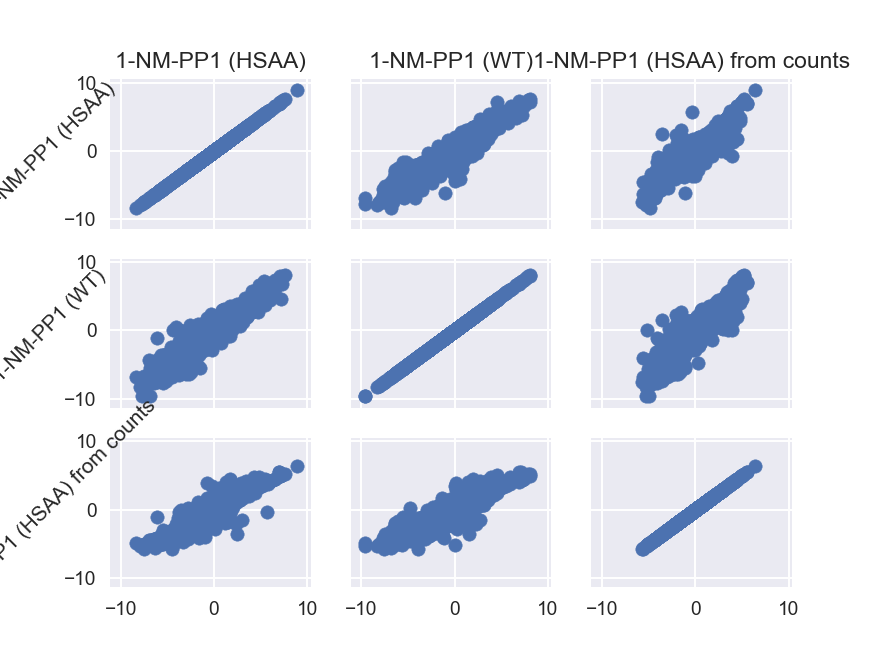

In [61]:
#Control: does count data fold change correlate with fold change from David's paper? 
pseudocount = 1  #not sure what the best pseudocount is
solis_SC_fc_from_counts = np.log((solis_counts['1NM_norm'] + pseudocount)/(solis_counts['control_norm']+pseudocount)) 
solis_SC_countqc = pd.concat([solis_SC, solis_SC_fc_from_counts], axis = 1, join_axes = [solis_SC.index])
solis_SC_countqc.columns = ['1-NM-PP1 (HSAA)', '1-NM-PP1 (WT)', '1-NM-PP1 (HSAA) from counts']
fig, axarr = expression_plots.multi_scatter_plot(solis_SC_countqc, solis_SC_countqc.columns)
 

https://github.com/kmace/kinase/blob/master/src/preprocessing/run_one_library.sh

#!/bin/bash
source_location=$1
source_filename=$2
untarred_filename=`basename ${source_filename} .tar.gz`
sample_name=$3

#updated to extract the file out of tar ball
cd fastq
cp ${source_location}/QualityScore/${source_filename} ${sample_name}_sequence.txt.tar.gz
tar -xf ${sample_name}_sequence.txt.tar.gz # should go to local -C . fastq/${sample_name}_sequence.txt.tar.gz
mv ./lab/solexa_public/Pincus/*/QualityScore/${untarred_filename} ${sample_name}_sequence.txt
gzip ${sample_name}_sequence.txt
#rm -rf ./lab
cd ..
tophat --solexa1.3-quals -p 4 --segment-length 20 -I 2500 -G /nfs/genomes/sgd_2010/gtf/Saccharomyces_cerevisiae.R64-1-1.80_chr.gtf -o tophat_output/${sample_name} /nfs/genomes/sgd_2010/bowtie/sacCer3 fastq/${sample_name}_sequence.txt.gz
mv tophat_output/${sample_name}/accepted_hits.bam bam/${sample_name}.bam
htseq-count -f bam -m intersection-strict --stranded=reverse bam/${sample_name}.bam /nfs/genomes/sgd_2010/gtf/Saccharomyces_cerevisiae.R64-1-1.80_chr.gtf > counts/${sample_name}_gene_counts.txt


--stranded = reverse doesn't work for different protocols - might not have worked for standard protocol (is that the same as tru-seq standard) maybe igx-RNA adapters./  protocol from whitehead. 

- TDH3 and TEF1 had no counts (although TEF1 missing from david's data) 

STAR protocols

will be moved to src/preprocessing later
https://github.com/kmace/kinase/blob/master/src/preprocessing/star/create_genome.sh
https://github.com/kmace/kinase/blob/master/src/preprocessing/star/align_library.sh


In [40]:
solis_SC_data_counts

,Inhib,X466.1NM,0
YAL008W,2.593572,2.086510,NaN
YBR255W,0.656716,0.126053,1.348984
YGR131W,0.806838,0.613075,-inf
YNL003C,0.870790,0.831313,-0.598509
YBR135W,-0.891713,-0.353164,inf
YBR160W,-0.305073,0.181006,1.628726
YJL082W,1.312347,-0.276113,-1.362292
YPL191C,1.050569,0.857590,-0.444034
YGL215W,-0.881780,-1.100930,-inf
YKL074C,-1.032084,-0.964169,-0.393628


Trouble: count fold change didn't seem to match - maybe I need to normalize by total counts.  

Solis et al : 
Data were processed using a local version of the Galaxy suite of next-generation
sequencing tools. Sequenced mRNA fragments were groomed and aligned to the S.
cerevisiae ORF coding reference genome (Feb. 2011) using Tophat before being
assembled and quantified using Cufflinks. Fold changes were computed using Cuffdiff.

<IPython.core.display.Javascript object>


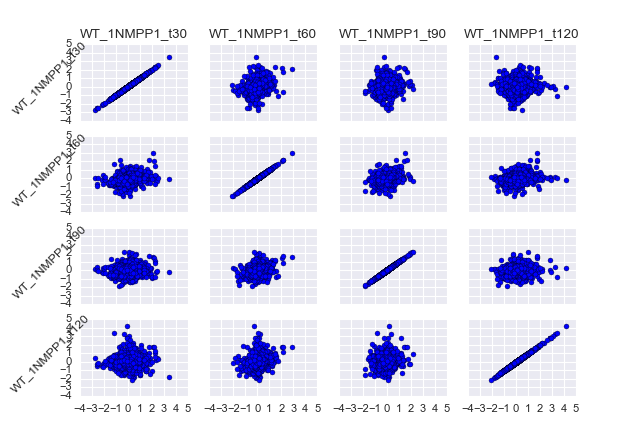

In [8]:
#Looking at NMPP1 only data from the shokat lab - the results weren't very illuminating - maybe that is a bad dataset. 

#Shokat Lab
fname_kung_SC_WT_NMPP1 = os.path.normpath(base_dir + '\expression_data\NMPP1_WT_Timecourse\\07170DataSet4.txt')
kung_SC_WT_NMPP1 = pd.read_table(fname_kung_SC_WT_NMPP1, sep = '\t', index_col = [0])
conditions_orig = kung_SC_WT_NMPP1.columns[1:]
conditions=  []
for condition in conditions_orig: 
    time = condition.split()[1]
    new_condition = 'WT_1NMPP1_t'+time
    conditions.append(new_condition)
    kung_SC_WT_NMPP1[new_condition]=np.log(kung_SC_WT_NMPP1[condition])/np.log(2)

#xlim = [-2, 7]
#xticks = [0.0,0.006,0.012]
#ylim = [-2, 7]
#yticks([0.0,0.006,0.012])
fig, axarr = expression_plots.multi_scatter_plot(kung_SC_WT_NMPP1, conditions) # xlim = xlim, ylim = ylim)


#Broach

#Merge NMPP1 only data with PKA data

#Scatter Plot